In [4]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset= open(r"C:\Users\Admin\Documents\data science\covid19_Confirmed_dataset.csv")
data =pd.read_csv(dataset)
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [5]:
# To show the columns of the data
data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=104)

In [6]:
#To know the shape of the data
data.shape

(266, 104)

In [7]:
# To delete the useless columns
data.drop(["Lat","Long"], axis=1, inplace= True)
data.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
#aggregate the rows by country
cdg= data.groupby("Country/Region").sum()
cdg.head()


,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [9]:
cdg.shape


(187, 101)

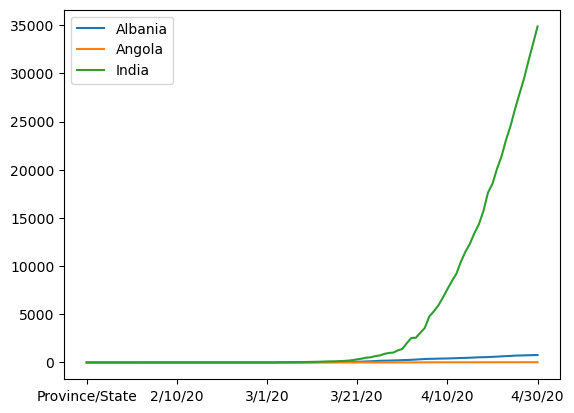

In [10]:
#To visualize the data according to the location
cdg.loc["Albania"].plot()
cdg.loc["Angola"].plot()
cdg.loc["India"].plot()
plt.legend()      # Used to label the lines in the graph

<Axes: >

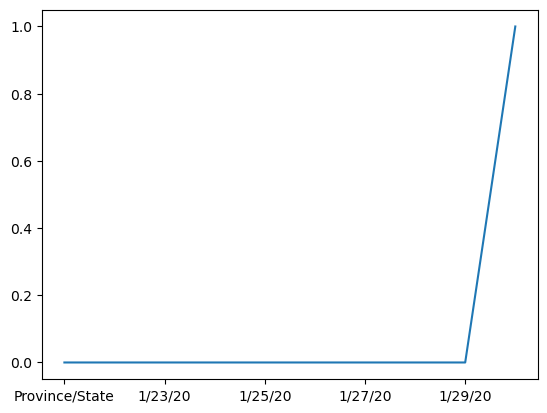

In [11]:
# Calculate the spread of the coronvirus
cdg.loc["India"][:10].plot() # in the first 10 days

<Axes: >

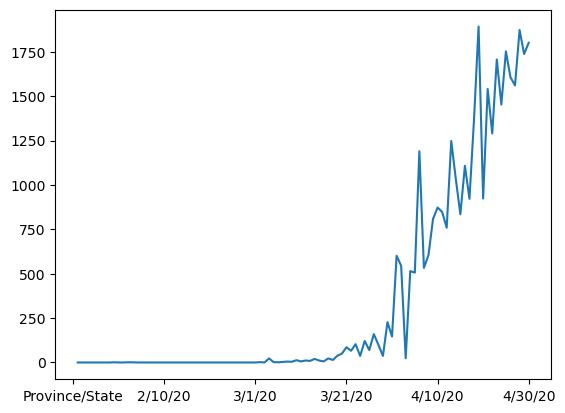

In [12]:
# Calculate the derivative of the above curve
cdg.loc["India"].diff().plot()

In [13]:
#max infection rate
cdg.loc["India"].diff().max()

1893

In [14]:
cdg.loc["Spain"].diff().max()

9630

In [15]:
print(cdg.dtypes)

Province/State    object
1/22/20            int64
1/23/20            int64
1/24/20            int64
1/25/20            int64
                   ...  
4/26/20            int64
4/27/20            int64
4/28/20            int64
4/29/20            int64
4/30/20            int64
Length: 101, dtype: object


In [16]:
cdg = cdg.apply(pd.to_numeric, errors='coerce') # as the data type was object so changed into numeric so that loop can be applied
print(cdg.dtypes)

Province/State    float64
1/22/20             int64
1/23/20             int64
1/24/20             int64
1/25/20             int64
                   ...   
4/26/20             int64
4/27/20             int64
4/28/20             int64
4/29/20             int64
4/30/20             int64
Length: 101, dtype: object


In [17]:
#To find max infection for all of the countries
countries= list(cdg.index) #Makes the list of countries which are on index
max_infection_rates= []

for c in countries:
    max_infection_rates.append(cdg.loc[c].diff().max()) #will iterate over the countires and add the max impact values in the list 
    
cdg["Max_infection_rate"]= max_infection_rates  
    

In [18]:
print(cdg)

                    Province/State  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                           
Afghanistan                    0.0        0        0        0        0   
Albania                        0.0        0        0        0        0   
Algeria                        0.0        0        0        0        0   
Andorra                        0.0        0        0        0        0   
Angola                         0.0        0        0        0        0   
...                            ...      ...      ...      ...      ...   
West Bank and Gaza             0.0        0        0        0        0   
Western Sahara                 0.0        0        0        0        0   
Yemen                          0.0        0        0        0        0   
Zambia                         0.0        0        0        0        0   
Zimbabwe                       0.0        0        0        0        0   

                    1/26/20  1/27/20 

In [19]:
# To create the dataset with only the needed values which is max infection values
corona_data=pd.DataFrame(cdg["Max_infection_rate"])
corona_data.head()

,Max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [20]:
# Happiness report
happiness= open(r"C:\Users\Admin\Documents\data science\worldwide_happiness_report.csv")
report =pd.read_csv(happiness)
report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [21]:
# To drop the useless columns from the dataset
delete= ["Overall rank","Score", "Generosity", "Perceptions of corruption"]
report.drop(delete, axis=1, inplace=True)
report

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...,...
151,Rwanda,0.359,0.711,0.614,0.555
152,Tanzania,0.476,0.885,0.499,0.417
153,Afghanistan,0.350,0.517,0.361,0.000
154,Central African Republic,0.026,0.000,0.105,0.225


In [22]:
# To set any column as the index of the dataset
report.set_index("Country or region", inplace=True)
report

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...
Rwanda,0.359,0.711,0.614,0.555
Tanzania,0.476,0.885,0.499,0.417
Afghanistan,0.350,0.517,0.361,0.000


In [23]:
# To check the shape of both of the datasets
corona_data.shape

(187, 1)

In [24]:
report.shape

(156, 4)

In [25]:
# To join both of the datasets

main_data= corona_data.join(report, how="inner")
main_data

,Max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154
Vietnam,19.0,0.741,1.346,0.851,0.543
Yemen,5.0,0.287,1.163,0.463,0.143
Zambia,9.0,0.578,1.058,0.426,0.431


In [26]:
# To correlate the data that how one values varies with the other
main_data.corr()

,Max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


In [27]:
main_data

,Max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154
Vietnam,19.0,0.741,1.346,0.851,0.543
Yemen,5.0,0.287,1.163,0.463,0.143
Zambia,9.0,0.578,1.058,0.426,0.431


In [34]:
main_data.columns


Index(['Max_infection_rate', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices'],
      dtype='object')

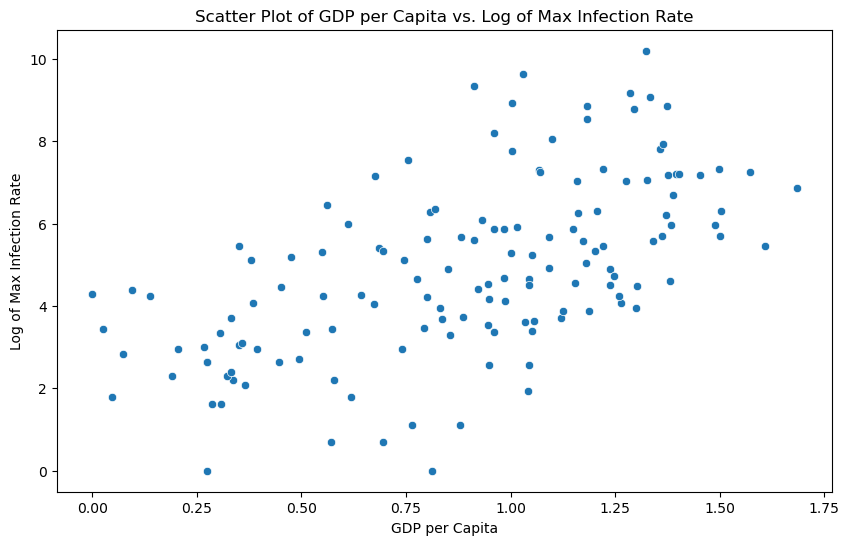

In [38]:
# Example: If the correct column is 'Max Infection Rate'
y = main_data["Max_infection_rate"].replace(0, np.nan)  # Replace with actual column name

plt.figure(figsize=(10, 6))
sns.scatterplot(x=main_data["GDP per capita"], y=np.log(y))
plt.title("Scatter Plot of GDP per Capita vs. Log of Max Infection Rate")
plt.xlabel("GDP per Capita")
plt.ylabel("Log of Max Infection Rate")
plt.show()


<Axes: xlabel='GDP per capita', ylabel='Max_infection_rate'>

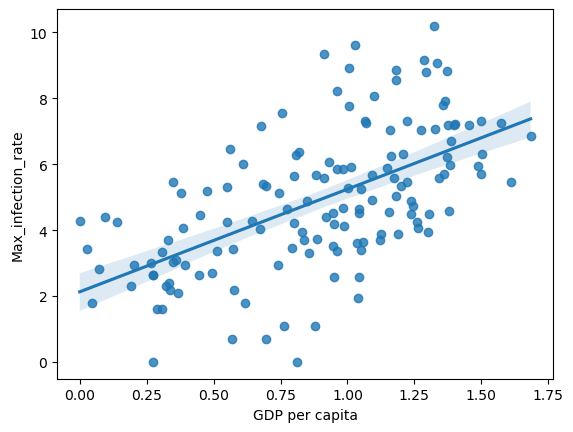

In [41]:
sns.regplot(x=main_data["GDP per capita"], y=np.log(y))

<Axes: xlabel='Social support', ylabel='Max_infection_rate'>

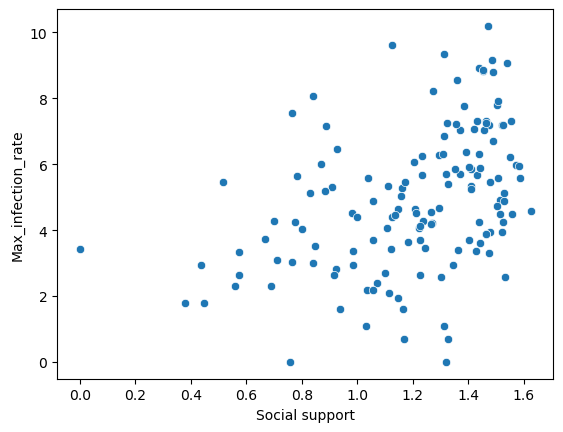

In [43]:

sns.scatterplot(x=main_data["Social support"], y=np.log(y))


<Axes: xlabel='Social support', ylabel='Max_infection_rate'>

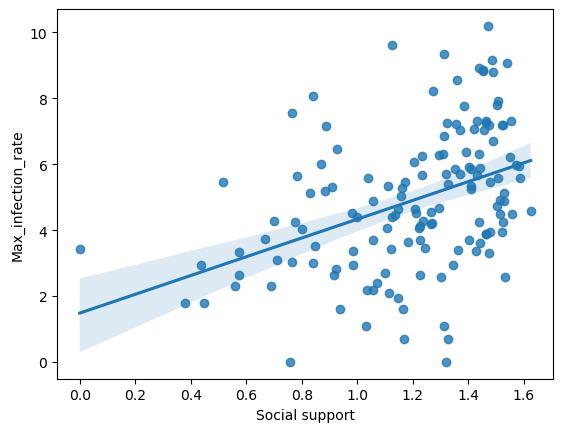

In [44]:
sns.regplot(x=main_data["Social support"], y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='Max_infection_rate'>

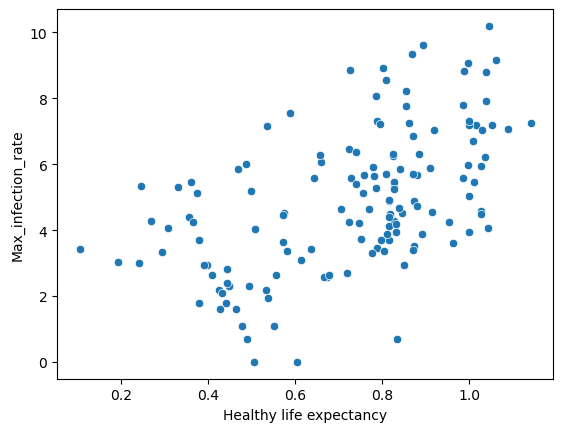

In [46]:

sns.scatterplot(x=main_data["Healthy life expectancy"], y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='Max_infection_rate'>

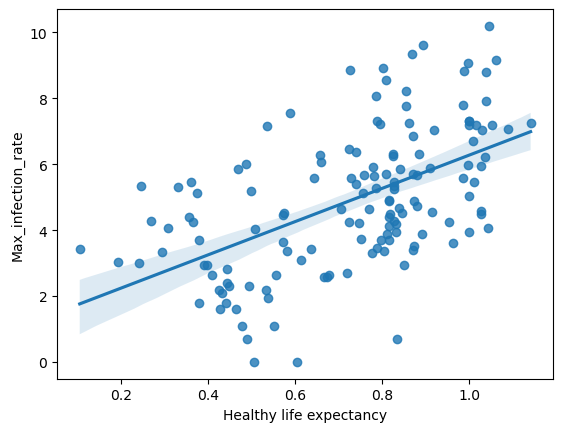

In [47]:
sns.regplot(x=main_data["Healthy life expectancy"], y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='Max_infection_rate'>

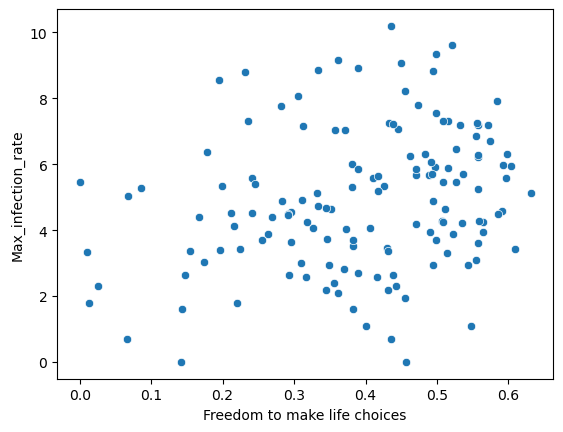

In [48]:
sns.scatterplot(x=main_data["Freedom to make life choices"], y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='Max_infection_rate'>

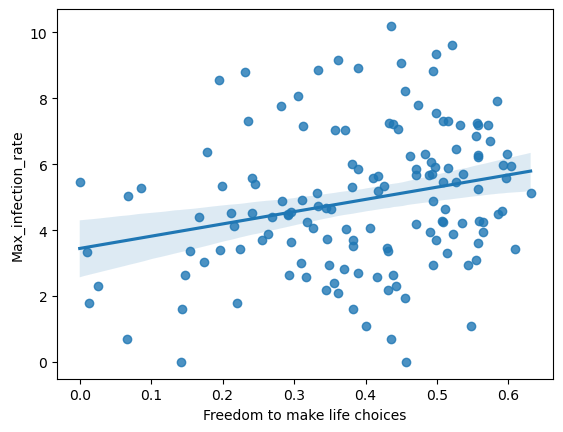

In [49]:
sns.regplot(x=main_data["Freedom to make life choices"], y=np.log(y))